<a href="https://colab.research.google.com/github/vifirsanova/OCR_Glossary/blob/main/workbook_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

По всем вопросам: [vifirsanova@gmail.com]()

# Загрузка библиотек

In [4]:
# удобная библиотека для работы с директориями
# помогает быстро открывать файлы с разными расширениями

from pathlib import Path

# RegEx 

import re

# NLTK

import nltk
nltk.download('punkt')

# Collections

import collections

# Pandas

import pandas as pd

# Загрузка данных

Загружаем текстовый файл с GitHub напрямую

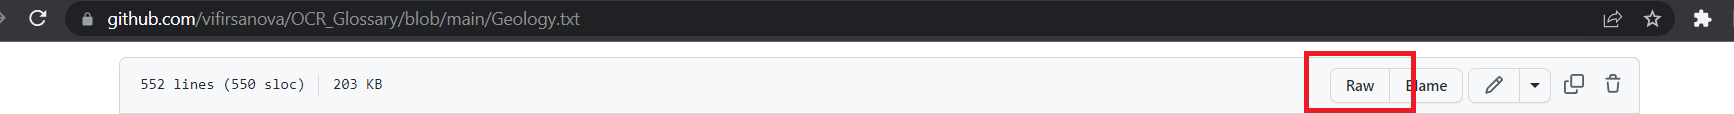

In [1]:
# для загрузки файлов используем команду wget
# это консольная команда Linux (не Python)
# Google Colab позволяет использовать консольные команды вместе с программным кодом на Python

!wget https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Geology.txt

--2023-01-24 11:07:00--  https://raw.githubusercontent.com/vifirsanova/OCR_Glossary/main/Geology.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207953 (203K) [text/plain]
Saving to: ‘Geology.txt’

Geology.txt         100%[===================>] 203.08K  --.-KB/s    in 0.005s  

2023-01-24 11:07:00 (40.4 MB/s) - ‘Geology.txt’ saved [207953/207953]



Открываем файл и сохраняем для использования

In [81]:
# используем библиотеку Path вместо нативного метода
# в перменной text хранится сырой текст

text = Path('Geology.txt').read_text()

# в Colab можно посмотреть на данные, не вызывая print
# достаточно указать имя переменной внизу блока с кодом
# посмотрим на часть данных из середины

text[1000:1500]

'scientific study.\nExplain rhetorical arguments used by science deniers.\n1.1 What is Science?\nScientists seek to understand the fundamental principles that explain natural patterns and processes. Science is more than just a body of knowledge, science provides a means to evaluate and create new knowledge without bias. Scientists use objective evidence over subjective evidence, to reach sound and logical conclusions.\nAn objective observation is without personal bias and the same by all individuals.'

# Элементарный алгоритм для построения частотного словаря

Сначала попробуем самый простой метод, создание частотного словаря без построения представлений слов

## Чистка данных с помощью RegEx

Какие символы могут вызвать трудности для обработки текста?

* Знаки препинания и цифры

In [105]:
# заменяем на пробел все символы кроме букв, апострофов и дефисов

clean_text_ = re.sub("[^a-zA-Z’-]", " ", text)
clean_text_[2000:2500]

' heavy is a qualitative observation  Determining a rock’s color by measuring wavelengths of reflected light or its density by measuring the proportions of minerals it contains is quantitative  Numerical values are more precise than general descriptions  and they can be analyzed using statistical calculations  This is why quantitative measurements are much more useful to scientists than qualitative observations  Establishing truth in science is difficult because all scientific claims are falsifia'

* Лишние пробелы

In [109]:
clean_text = re.sub("\s+", " ", clean_text_)
clean_text[2000:2500]

' by measuring wavelengths of reflected light or its density by measuring the proportions of minerals it contains is quantitative Numerical values are more precise than general descriptions and they can be analyzed using statistical calculations This is why quantitative measurements are much more useful to scientists than qualitative observations Establishing truth in science is difficult because all scientific claims are falsifiable which means any initial hypothesis may be tested and proven fal'

### Маленькое упражнение

В этом тексте есть:
* HTML-артефакты `<div>`
* лишние пробелы 
* ссылка `http://login.com`
* ненужные символы `# &`

Предлагаю почистить этот пример с помощью RegEx, чтобы потренироваться с регулярными выражениями.

Пример можно найти здесь: https://turbolab.in/data-cleaning-using-regular-expression/

In [ ]:
test = '<div>      What is Science?&  Scientists seek to understand the fundamental# principles that explain natural patterns and processes.  Science http://login.com '

clean_test = ### ВВЕДИТЕ СЮДА СВОЙ КОД ###

## Токенизация

Завершим предобработку: приведем все слова к нижнему регистру и сделаем пословную токенизацию

In [120]:
# функция для простой токенизации
# принимает на вход текст
# приводит текст к нижнем регистру с помощью lower()
# "рубит" текст на элементы, разделенные пробелом (слова)

def tokenize(text):
  return text.lower().split(' ')

tokenized = tokenize(clean_text)
tokenized[200:210]

['same',
 'by',
 'all',
 'individuals',
 'humans',
 'are',
 'biased',
 'by',
 'nature',
 'so']

Сравним с токенизацией NLTK

In [119]:
# импортируем токенизатор NLTK

from nltk.tokenize import word_tokenize

# применим токенизатор к двум текстам: 
# к сырому

text_tokens = word_tokenize(text)

# и к чистому

clean_text_tokens = word_tokenize(clean_text)

print('Токенизированный "чистый текст"', clean_text_tokens[200:210])
print('Токенизированный "сырой текст"', text_tokens[200:210])

Токенизированный "чистый текст" ['conclusions', 'An', 'objective', 'observation', 'is', 'without', 'personal', 'bias', 'and', 'the']
Токенизированный "сырой текст" ['to', 'evaluate', 'and', 'create', 'new', 'knowledge', 'without', 'bias', '.', 'Scientists']


## Удаление стоп-слов



In [128]:
# загрузим список стоп-слов из NLTK 

from nltk.corpus import stopwords
nltk.download('stopwords')

# сохраним стоп-слова для английского языка в отдельный список

sw = stopwords.words('english')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
# посмотрим на предложенный список

print(sw[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [130]:
# чтобы удалить стоп-слова, "пробежимся" по токенизированному списку
# если слово отсутсвует в списке стоп-слов, сохраним его в новый список tokenized_no_sw

tokenized_no_sw = [x for x in tokenized if not x in sw]

# посмотрим на новый список 

tokenized_no_sw[200:210]

['scientists',
 'qualitative',
 'observations',
 'establishing',
 'truth',
 'science',
 'difficult',
 'scientific',
 'claims',
 'falsifiable']

### Маленькое упражнение

Допустим, мы хотим дополнить список стоп-слов терминами из нашей предметной области. Новые стоп-слова хранятся в списке `domain_list`. 

Как обновить токенизированный список, удалив из него новые стоп-слова?

In [143]:
domain_list = ['scientists', 'claims', 'science']

### ВВЕДИТЕ КОД ЗДЕСЬ ###
### ВВЕДИТЕ КОД ЗДЕСЬ ###
### ВВЕДИТЕ КОД ЗДЕСЬ ###

new_tokens_without_sw = ### ВВЕДИТЕ КОД ЗДЕСЬ ###

new_tokens_without_sw[200:210]

# Ожидаемые выходные данные: ['initial', 'hypothesis', 'may', 'tested', 'proven', 'false', 'exhaustively', 'eliminating', 'false', 'results']

['initial', 'hypothesis', 'may', 'tested', 'proven', 'false', 'exhaustively', 'eliminating', 'false', 'results']


Посмотреть, как использовать другие библиотеки для работы со стоп-словами: https://stackabuse.com/removing-stop-words-from-strings-in-python/#usingthespacylibrary

## Лемматизация

In [ ]:
# продолжим работу с NLTK, загрузим готовый лемматизатор

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# инициализируем лемматизатор

lemmatizer = WordNetLemmatizer()

In [165]:
# применим лемматизатор к каждому элементу из списка токенов, очищенных от стоп-слов 

lemmatized = [lemmatizer.lemmatize(x) for x in tokenized_no_sw]

# посмотрим на результаты лемматизации

print('До лемматизации:   ', tokenized_no_sw[200:210], '\nПосле лемматизации:', lemmatized[200:210])

До лемматизации:    ['scientists', 'qualitative', 'observations', 'establishing', 'truth', 'science', 'difficult', 'scientific', 'claims', 'falsifiable'] 
После лемматизации: ['scientist', 'qualitative', 'observation', 'establishing', 'truth', 'science', 'difficult', 'scientific', 'claim', 'falsifiable']


### Упражнение / рефлексия

Ниже приведен пример использования библиотеки Spacy для лемматизации для русского и английского языков.

Как можно применить ее для решения ваших задач?

В чем принципиальное отличие от NLTK?

In [173]:
# загрузка spacy

import spacy
nlp = spacy.load('en_core_web_sm')

# пример использования лемматизации

doc = nlp(u"This is a basic example of Spacy lemmatization. There are so many lemmatizers!")

for token in doc:
    print(token, token.lemma_)

This this
is be
a a
basic basic
example example
of of
Spacy Spacy
lemmatization lemmatization
. .
There there
are be
so so
many many
lemmatizers lemmatizer
! !


In [ ]:
# загрузка данных spacy для русского языка

!python -m spacy download ru_core_news_sm

In [178]:
# использование spacy для русского языка

nlp = spacy.load('ru_core_news_sm')

doc = nlp(u"Это простой пример лемматизации с помощью Spacy.")

for token in doc:
    print(token, token.lemma_)

Это это
простой простой
пример пример
лемматизации лемматизация
с с
помощью помощь
Spacy spacy
. .


## Построение сложного словаря с помощью Collections

In [190]:
# нам понадобится один метод из библиотеки Collections

from collections import Counter

# частотный словарь строится автоматически

glossary = Counter(lemmatized)

# сохраним наиболее частотные элементы словаря

freq_glossary = glossary.most_common(100)

# посмотрим на результат

freq_glossary[:10]

[('mineral', 295),
 ('rock', 263),
 ('plate', 207),
 ('magma', 147),
 ('called', 112),
 ('crystal', 108),
 ('continental', 88),
 ('volcano', 85),
 ('example', 83),
 ('scientific', 81)]

### Анализ

* Такие примеры, как `called` и `example`, можно добавить в список стоп-слов
* Такой список не содержит словосочетаний
* Питоновский `dict` не удобен для визуализации
* Что еще можно улучшить? Как это сделать?

# Визуализация результатов

Визуализировать данные можно с помощью библиотеки Pandas, популярного инструмента для Data Science.

In [198]:
# преобразуем словарь к виду таблицы (объект DataFrame)
# выбираем названия колонок
# отображаем в Google Colab

df = pd.DataFrame(freq_glossary, columns =['word', 'frequency'])
  
df.style

,word,frequency
0,mineral,295
1,rock,263
2,plate,207
3,magma,147
4,called,112
5,crystal,108
6,continental,88
7,volcano,85
8,example,83
9,scientific,81


## Сохраняем результат

Обычно DataFrame сохраняется в формате `csv`, но мы можем сохранить в Excel.



In [199]:
# преобразование в Excel

df.to_excel("output.xlsx")  

Находим файл и скачиваем его.

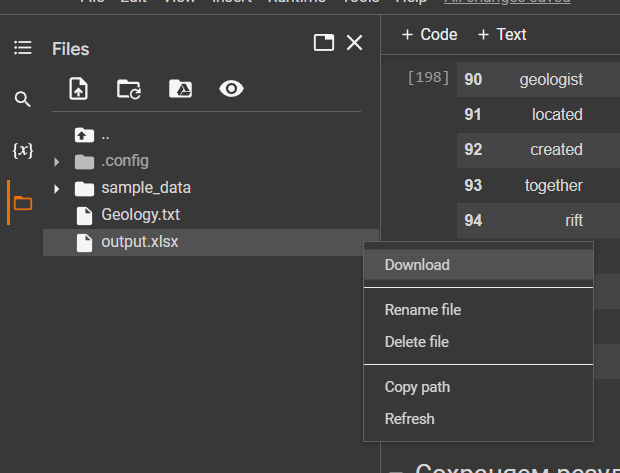

# Заключительные мысли

* Посмотрим на результат работы в Excel
* Выделим основные преимущества и недостатки подхода
* Что можно изменить в текущем алгоритме, чтобы улучшить результат? 
* Для решения каких проблем нужно использовать более продвинутые решения?